# #including the header files

In [230]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Importing the File

In [231]:
df= pd.read_csv(r'C:\Users\xyz\1805348.csv')

In [232]:
lt=df.columns
print("Total list of columns:- {}".format(lt))

Total list of columns:- Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')


In [373]:
print("The shape of dataset:-{}".format(df.shape))
df.dtypes

The shape of dataset:-(49993, 24)


cust_number                                 object
name_customer                               object
clear_date                          datetime64[ns]
due_in_date                         datetime64[ns]
total_open_amount                          float64
baseline_create_date                datetime64[ns]
cust_payment_terms                          object
isOpen                                       int64
baseline_create_date_year                    int64
baseline_create_date_month                   int64
baseline_create_date_day                     int64
baseline_create_date_quarter                 int64
baseline_create_date_day_of_week             int64
baseline_create_date_isWeekand               int32
CA02                                       float64
U001                                       float64
U002                                       float64
U005                                       float64
U007                                       float64
U013                           

# DATA PRE-PROCESSING

In [461]:
print("Total Number of duplicated rows:-{}".format(df.duplicated().sum()))
print("\n\nTotal Number of Null Values:-\n{}".format(df.isnull().sum()))
print("\n\nTotal Number of Unique Values:-\n{}".format(df.nunique()))

Total Number of duplicated rows:-21


Total Number of Null Values:-
cust_number                            0
name_customer                          0
clear_date                          4413
due_in_date                            0
total_open_amount                      0
baseline_create_date                   0
cust_payment_terms                     0
baseline_create_date_year              0
baseline_create_date_month             0
baseline_create_date_day               0
baseline_create_date_quarter           0
baseline_create_date_day_of_week       0
baseline_create_date_isWeekand         0
CA02                                   0
U001                                   0
U002                                   0
U005                                   0
U007                                   0
U013                                   0
invoice_currency_numeric               0
due_in_date_day                        0
clear_date_day                      4413
Delay                         

In [306]:
df['baseline_create_date_year'].value_counts()

2019    39707
2020    10144
2018      142
Name: baseline_create_date_year, dtype: int64

In [315]:
df.describe()

,doc_id,total_open_amount,invoice_id,isOpen,business_year,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,...,document_create_date_day,document_create_date.1_year,document_create_date.1_month,document_create_date.1_day,due_in_date_year,due_in_date_month,due_in_date_day,clear_date_year,clear_date_month,clear_date_day
count,4.999300e+04,49993.000000,4.999300e+04,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,...,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,45580.000000,45580.000000,45580.000000
mean,2.013212e+09,32284.734302,2.013212e+09,0.088272,2019.207089,2019.200068,5.527954,15.292161,2.197448,2.698058,...,15.458904,2019.199928,5.521253,15.542016,2019.211330,5.939472,15.960294,2019.130320,6.205331,15.949188
std,2.796406e+08,39745.604488,2.796406e+08,0.283693,0.405224,0.407093,3.404820,8.864817,1.112078,1.832157,...,8.784957,0.406990,3.403852,8.767922,0.408403,3.374593,8.693953,0.336659,3.481857,8.939441
min,1.928490e+09,1.030000,1.928490e+09,0.000000,2019.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,2018.000000,1.000000,1.000000,2018.000000,1.000000,1.000000,2019.000000,1.000000,1.000000
25%,1.929231e+09,4762.470000,1.929231e+09,0.000000,2019.000000,2019.000000,3.000000,8.000000,1.000000,1.000000,...,8.000000,2019.000000,3.000000,8.000000,2019.000000,3.000000,8.000000,2019.000000,3.000000,8.000000
50%,1.929813e+09,17274.100000,1.929813e+09,0.000000,2019.000000,2019.000000,5.000000,15.000000,2.000000,3.000000,...,15.000000,2019.000000,5.000000,15.000000,2019.000000,5.000000,16.000000,2019.000000,6.000000,16.000000
75%,1.930412e+09,47018.400000,1.930412e+09,0.000000,2019.000000,2019.000000,8.000000,23.000000,3.000000,4.000000,...,23.000000,2019.000000,8.000000,23.000000,2019.000000,9.000000,24.000000,2019.000000,9.000000,24.000000
max,2.960636e+09,838758.370000,2.960636e+09,1.000000,2020.000000,2020.000000,12.000000,31.000000,4.000000,6.000000,...,31.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000,2020.000000,12.000000,31.000000


## Changing date type

In [235]:
df['business_year']=df['buisness_year'].astype('int64')
df.drop(['buisness_year'],axis=1,inplace=True)

## Date-Time Conversion

In [236]:
df['due_in_date_int']= df['due_in_date'].astype('int')
df['due_in_date_str'] = df['due_in_date_int'].astype('str')
df['due_in_date_temp'] = pd . to_datetime(df['due_in_date_str'])
df['due_in_date']= df['due_in_date_temp']

In [129]:
df['due_in_date']= df['due_in_date_date']

In [237]:
df['document_create_date.1_int']= df['document_create_date.1'].astype('int')
df['document_create_date.1_str'] = df['document_create_date.1_int'].astype('str')
df['document_create_date.1_temp'] = pd . to_datetime(df['document_create_date.1_str'])
df['document_create_date.1']= df['document_create_date.1_temp']

In [127]:
df['document_create_date.1']= df['document_create_date.1_date']

In [238]:
df['document_create_date_int']= df['document_create_date'].astype('int')
df['document_create_date_str'] = df['document_create_date_int'].astype('str')
df['document_create_date_temp'] = pd . to_datetime(df['document_create_date_str'])
df['document_create_date']= df['document_create_date_temp']

In [126]:
df['document_create_date']= df['document_create_date_date']

In [239]:
df['posting_date_str'] = df['posting_date'].astype('str')
df['posting_date_temp'] = pd . to_datetime(df['posting_date_str'])
df['posting_date']= df['posting_date_temp']

In [124]:
df['posting_date']= df['posting_date_date']

In [240]:
df['clear_date_str'] = df['clear_date'].astype('str')
df['clear_date_temp'] = pd . to_datetime(df['clear_date_str'])
df['clear_date']= df['clear_date_temp']

In [241]:
df['baseline_create_date_int']= df['baseline_create_date'].astype('int')
df['baseline_create_date_str'] = df['baseline_create_date_int'].astype('str')
df['baseline_create_date_temp'] = pd . to_datetime(df['baseline_create_date_str'])
df['baseline_create_date']= df['baseline_create_date_temp']

In [282]:
df.dtypes

cust_number                                 object
name_customer                               object
clear_date                          datetime64[ns]
doc_id                                     float64
posting_date                        datetime64[ns]
document_create_date                datetime64[ns]
document_create_date.1              datetime64[ns]
due_in_date                         datetime64[ns]
total_open_amount                          float64
baseline_create_date                datetime64[ns]
cust_payment_terms                          object
invoice_id                                 float64
isOpen                                       int64
business_year                                int64
baseline_create_date_year                    int64
baseline_create_date_month                   int64
baseline_create_date_day                     int64
baseline_create_date_quarter                 int64
baseline_create_date_day_of_week             int64
baseline_create_date_isWeekand 

## Dropping multiple temporary columns 

In [243]:
df.drop(['due_in_date_int','due_in_date_str','due_in_date_temp','clear_date_str','clear_date_temp','posting_date_str','posting_date_temp','document_create_date_str','document_create_date_temp','document_create_date_int','document_create_date.1_str','document_create_date.1_int','document_create_date.1_temp'], axis=1, inplace=True)

In [244]:
df.drop(['baseline_create_date_int','baseline_create_date_str','baseline_create_date_temp'] , axis=1, inplace= True)

In [283]:
df.head()

,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,...,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,U007,U013,invoice_currency_numeric
0,0140104392,FLANAG foundation,2019-04-29,2.960541e+09,2019-04-11,2019-04-11,2019-04-11,2019-04-22,4398.10,2019-04-12,...,2,4,0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,0200759878,SA in,2019-05-20,1.929233e+09,2019-05-02,2019-04-30,2019-05-02,2019-05-17,15725.29,2019-05-02,...,2,3,0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0200865666,RESTAU associates,2019-11-14,1.930077e+09,2019-10-30,2019-10-30,2019-10-30,2019-11-14,3816.99,2019-10-30,...,4,2,0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0200763152,PERFOR us,2019-02-15,1.928696e+09,2019-01-29,2019-01-28,2019-01-29,2019-02-13,25257.66,2019-01-29,...,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,0200742791,QUI co,2020-03-11,1.930561e+09,2020-02-25,2020-02-24,2020-02-25,2020-03-11,41741.70,2020-02-25,...,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1


## Splitting dates 

In [291]:
df['document_create_date_year'] = df['document_create_date'].dt.year
df['document_create_date_month'] = df['document_create_date'].dt.month
df['document_create_date_day'] = df['document_create_date'].dt.day

In [292]:
df['document_create_date.1_year'] = df['document_create_date.1'].dt.year
df['document_create_date.1_month'] = df['document_create_date.1'].dt.month
df['document_create_date.1_day'] = df['document_create_date.1'].dt.day

In [293]:
df['due_in_date_year'] = df['due_in_date'].dt.year
df['due_in_date_month'] = df['due_in_date'].dt.month
df['due_in_date_day'] = df['due_in_date'].dt.day

In [294]:
df['clear_date_year'] = df['clear_date'].dt.year
df['clear_date_month'] = df['clear_date'].dt.month
df['clear_date_day'] = df['clear_date'].dt.day

## Splitting Baseline create date

In [246]:
df['baseline_create_date_year'] = df['baseline_create_date'].dt.year
df['baseline_create_date_month'] = df['baseline_create_date'].dt.month
df['baseline_create_date_day'] = df['baseline_create_date'].dt.day
df['baseline_create_date_quarter'] = df['baseline_create_date'].dt.quarter
df['baseline_create_date_day_of_week'] = df['baseline_create_date'].dt.dayofweek
df['baseline_create_date_isWeekand'] = np.where(df['baseline_create_date_day_of_week'].isin([5,6]),1,0)

In [247]:
df[['baseline_create_date','baseline_create_date_year','baseline_create_date_month','baseline_create_date_day','baseline_create_date_quarter','baseline_create_date_day_of_week','baseline_create_date_isWeekand']].head(3)


,baseline_create_date,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand
0,2019-04-12,2019,4,12,2,4,0
1,2019-05-02,2019,5,2,2,3,0
2,2019-10-30,2019,10,30,4,2,0


## One-Hot Encoding 

In [248]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,business_code,cust_number,name_customer,invoice_currency,document type,cust_payment_terms
0,CA02,0140104392,FLANAG foundation,CAD,RV,CA10
1,U001,0200759878,SA in,USD,RV,NAH4
2,U001,0200865666,RESTAU associates,USD,RV,NAA8
3,U001,0200763152,PERFOR us,USD,RV,NAA8
4,U001,0200742791,QUI co,USD,RV,NAA8


In [249]:
flt_df = obj_df.select_dtypes(include=['float64']).copy()
flt_df.head()

""
0
1
2
3
4


In [250]:

from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(obj_df[["business_code"]])
obj_df = obj_df.join(pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_))


In [251]:
flt_df = obj_df.select_dtypes(include=['float64']).copy()
flt_df.head()
flt_df.columns = ['CA02','U001','U002','U005','U007','U013']
flt_df.head()

,CA02,U001,U002,U005,U007,U013
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0


In [252]:
df = pd.concat([df, flt_df], axis =1)


In [253]:
df.loc[df['U002'].isnull(),:]

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,...,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,U007,U013


In [254]:
df['U013'] = df['U013'].fillna(0)

In [278]:
df1.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,...,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,U007,U013
0,CA02,0140104392,FLANAG foundation,2019-04-29,2.960541e+09,2019-04-11,2019-04-11,2019-04-11,2019-04-22,CAD,...,12,2,4,0,1.0,0.0,0.0,0.0,0.0,0.0
1,U001,0200759878,SA in,2019-05-20,1.929233e+09,2019-05-02,2019-04-30,2019-05-02,2019-05-17,USD,...,2,2,3,0,0.0,1.0,0.0,0.0,0.0,0.0
2,U001,0200865666,RESTAU associates,2019-11-14,1.930077e+09,2019-10-30,2019-10-30,2019-10-30,2019-11-14,USD,...,30,4,2,0,0.0,1.0,0.0,0.0,0.0,0.0
3,U001,0200763152,PERFOR us,2019-02-15,1.928696e+09,2019-01-29,2019-01-28,2019-01-29,2019-02-13,USD,...,29,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0
4,U001,0200742791,QUI co,2020-03-11,1.930561e+09,2020-02-25,2020-02-24,2020-02-25,2020-03-11,USD,...,25,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0


In [256]:
df1.loc[df1['U002'].isnull(),:]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,baseline_create_date,cust_payment_terms,invoice_id,isOpen,CA02,U001,U002,U005,U007,U013


In [257]:
df1 = df.copy()
df1.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,...,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,U007,U013
0,CA02,0140104392,FLANAG foundation,2019-04-29,2.960541e+09,2019-04-11,2019-04-11,2019-04-11,2019-04-22,CAD,...,12,2,4,0,1.0,0.0,0.0,0.0,0.0,0.0
1,U001,0200759878,SA in,2019-05-20,1.929233e+09,2019-05-02,2019-04-30,2019-05-02,2019-05-17,USD,...,2,2,3,0,0.0,1.0,0.0,0.0,0.0,0.0
2,U001,0200865666,RESTAU associates,2019-11-14,1.930077e+09,2019-10-30,2019-10-30,2019-10-30,2019-11-14,USD,...,30,4,2,0,0.0,1.0,0.0,0.0,0.0,0.0
3,U001,0200763152,PERFOR us,2019-02-15,1.928696e+09,2019-01-29,2019-01-28,2019-01-29,2019-02-13,USD,...,29,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0
4,U001,0200742791,QUI co,2020-03-11,1.930561e+09,2020-02-25,2020-02-24,2020-02-25,2020-03-11,USD,...,25,1,1,0,0.0,1.0,0.0,0.0,0.0,0.0


In [258]:
df1['U002'] = df1['U002'].fillna(0)


In [259]:
df.at[49992,'U001'] = 1

In [260]:
df.at[49996,'CA02'] = 1
df.at[49993,'U001'] = 1
df.at[49994,'U001'] = 1
df.at[49995,'U001'] = 1
df.at[49997,'U001'] = 1
df.at[49998,'U001'] = 1
df.at[49999,'U001'] = int(1)


## Dropping Business code 

In [261]:
df.drop(['business_code'],axis=1,inplace=True)

## Dropping column with NaN value

In [ ]:
df.drop(['area_business'],axis=1,inplace=True)

## Dropping rows with null invoice id 

In [265]:
df = df[df['invoice_id'].notna()]

## Dropping Constant Columns

In [266]:
uc= [x for x in df.columns if df[x].nunique()==1]
df.drop(uc,axis=1,inplace=True)

C:\Users\xyz\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [290]:
df['isOpen'].value_counts()

0    45580
1     4413
Name: isOpen, dtype: int64

In [267]:
df.head(3)

,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,...,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,U007,U013
0,0140104392,FLANAG foundation,2019-04-29,2.960541e+09,2019-04-11,2019-04-11,2019-04-11,2019-04-22,CAD,4398.10,...,12,2,4,0,1.0,0.0,0.0,0.0,0.0,0.0
1,0200759878,SA in,2019-05-20,1.929233e+09,2019-05-02,2019-04-30,2019-05-02,2019-05-17,USD,15725.29,...,2,2,3,0,0.0,1.0,0.0,0.0,0.0,0.0
2,0200865666,RESTAU associates,2019-11-14,1.930077e+09,2019-10-30,2019-10-30,2019-10-30,2019-11-14,USD,3816.99,...,30,4,2,0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df['business_code'].value_counts()

## Converting 'CAD' to 0 and 'USD' to 1 into a new column named 'invoice_currency_numeric'

In [ ]:
df['invoice_currency_numeric'] = np.where(df['invoice_currency'] == 'CAD',0,1)

In [281]:
df['invoice_currency_numeric'].value_counts()

1    45989
0     4004
Name: invoice_currency_numeric, dtype: int64

In [272]:
df['isOpen'].value_counts()

0    45581
1     4413
Name: isOpen, dtype: int64

In [273]:
df['cust_payment_terms'].value_counts()

NAA8    20008
NAH4    13299
CA10     3899
NAC6     1769
NAM4     1327
        ...  
NATL        1
NATV        1
MC15        1
NATH        1
NA24        1
Name: cust_payment_terms, Length: 75, dtype: int64

## We can drop  the above row < 11246> as it's causing ambiguity 
## As there is a link between business_code and invoice_currency  column, we can drop invoice_currency 

In [ ]:
df['cmp'] = np.where((df.invoice_currency=='CAD') & (df.business_code != 'CA02'),1,0)
df.iloc[[df['cmp'].argmax()]]

In [275]:
df.drop(11246,inplace=True)

In [ ]:
df.drop(['cmp'], axis = 1,inplace=True) 

In [277]:
df.drop(['invoice_currency'],axis=1,inplace=True)

In [ ]:
df['document type'].value_counts()

In [ ]:
df['document_type_numeric'] = np.where(df['document type'] == 'RV',1,0)
df.drop(['document type'],axis=1,inplace=True)

## Quasi Constant

In [369]:
df1 = df.select_dtypes(include=['float64','int64','int32']).copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49993 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   total_open_amount                 49993 non-null  float64
 1   isOpen                            49993 non-null  int64  
 2   baseline_create_date_year         49993 non-null  int64  
 3   baseline_create_date_month        49993 non-null  int64  
 4   baseline_create_date_day          49993 non-null  int64  
 5   baseline_create_date_quarter      49993 non-null  int64  
 6   baseline_create_date_day_of_week  49993 non-null  int64  
 7   baseline_create_date_isWeekand    49993 non-null  int32  
 8   CA02                              49993 non-null  float64
 9   U001                              49993 non-null  float64
 10  U002                              49993 non-null  float64
 11  U005                              49993 non-null  float64
 12  U007

In [371]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
sel.fit(df1)
print(
    len([
        x for x in df1.columns
        if x not in df1.columns[sel.get_support()]
    ]))

[x for x in df1.columns if x not in df1.columns[sel.get_support()]]

3


['U002', 'U005', 'U007']

# ANAMOLY DELETE

In [287]:
(df['due_in_date'] < df['document_create_date.1']).sum()

133

In [286]:
(df['clear_date'] < df['baseline_create_date']).sum()

7

In [67]:
(df['invoice_id'].isnull()).sum()
df.loc[df['invoice_id'].isnull(),:]

TypeError: 'NoneType' object is not subscriptable

In [225]:
df['anamoly_date'] = np.where(df['due_in_date'] < df['document_create_date.1'],1,0)
df['anamoly_date_1'] = np.where((df['clear_date'] < df['baseline_create_date']),1,0)
#df.loc[df['anamoly_date']==1,:]

In [226]:
df.loc[df['anamoly_date']==1,:]

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,invoice_currency_numeric,business_year,anamoly_date,anamoly_date_1
972,U001,0200803720,DEC,2019-05-25,1.929379e+09,2019-05-25,2019-05-25,2019-05-25,2019-05-23,297.80,2019-05-16,NAM1,1.929379e+09,0,1,2019,1,0
1278,U001,0200353024,DECA in,2020-01-27,1.930444e+09,2020-01-27,2020-01-27,2020-01-27,2020-01-26,27921.27,2020-01-16,NAM2,1.930444e+09,0,1,2020,1,0
1621,U001,0200353024,DECA associates,2020-01-27,1.930444e+09,2020-01-27,2020-01-27,2020-01-27,2020-01-23,29563.52,2020-01-16,NAM1,1.930444e+09,0,1,2020,1,0
1660,CA02,0140104409,LOB systems,2019-02-21,2.960529e+09,2019-02-15,2019-02-15,2019-02-15,2019-01-25,1751.04,2019-01-15,CA10,2.960529e+09,0,0,2019,1,0
1801,U001,0200353024,DECA corporation,2019-05-13,1.929280e+09,2019-05-08,2019-05-08,2019-05-08,2019-04-24,20.64,2019-04-01,NAM4,1.929280e+09,0,1,2019,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49178,U001,0200754118,ARMY co,NaT,1.930861e+09,2020-05-06,2020-05-06,2020-05-06,2020-04-16,90.05,2020-04-01,NAM3,1.930861e+09,1,1,2020,1,0
49464,U001,0200230690,DECA foundation,NaT,1.930789e+09,2020-04-15,2020-04-15,2020-04-15,2020-04-08,1281.62,2020-03-16,NAM4,1.930789e+09,1,1,2020,1,0
49567,U001,0200754118,ARMY,NaT,1.930861e+09,2020-05-06,2020-05-06,2020-05-06,2020-04-16,391.79,2020-04-01,NAM3,1.930861e+09,1,1,2020,1,0
49703,U001,0200754118,ARMY corporation,NaT,1.930861e+09,2020-05-06,2020-05-06,2020-05-06,2020-04-16,223.33,2020-04-01,NAM3,1.930861e+09,1,1,2020,1,0


In [228]:
#df= df.drop(df[df['anamoly_date_1'] == 1].index,inplace=True)

In [ ]:
#df= df.drop(df[df['anamoly_date'] == 1].index,inplace=True)

In [288]:
(df['total_open_amount'] < 0).sum()

0

In [324]:
df.dtypes

cust_number                                 object
name_customer                               object
clear_date                          datetime64[ns]
doc_id                                     float64
posting_date                        datetime64[ns]
document_create_date                datetime64[ns]
document_create_date.1              datetime64[ns]
due_in_date                         datetime64[ns]
total_open_amount                          float64
baseline_create_date                datetime64[ns]
cust_payment_terms                          object
invoice_id                                 float64
isOpen                                       int64
baseline_create_date_year                    int64
baseline_create_date_month                   int64
baseline_create_date_day                     int64
baseline_create_date_quarter                 int64
baseline_create_date_day_of_week             int64
baseline_create_date_isWeekand               int32
CA02                           

In [321]:
corr = df[['document_create_date_day','baseline_create_date_day','document_create_date.1_day','due_in_date_day','clear_date_day']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,document_create_date_day,baseline_create_date_day,document_create_date.1_day,due_in_date_day,clear_date_day
document_create_date_day,1.00,0.78,0.83,-0.39,-0.34
baseline_create_date_day,0.78,1.00,0.95,-0.37,-0.33
document_create_date.1_day,0.83,0.95,1.00,-0.38,-0.34
due_in_date_day,-0.39,-0.37,-0.38,1.00,0.54
clear_date_day,-0.34,-0.33,-0.34,0.54,1.00


In [323]:
#dropping columns
df.drop(['document_create_date_day','document_create_date.1_day'] , axis=1, inplace= True)

In [319]:
corr = df[['document_create_date_month','baseline_create_date_month','document_create_date.1_month','due_in_date_month','clear_date_month']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,document_create_date_month,baseline_create_date_month,document_create_date.1_month,due_in_date_month,clear_date_month
document_create_date_month,1.00,0.98,0.98,0.90,0.92
baseline_create_date_month,0.98,1.00,1.00,0.92,0.94
document_create_date.1_month,0.98,1.00,1.00,0.92,0.94
due_in_date_month,0.90,0.92,0.92,1.00,0.97
clear_date_month,0.92,0.94,0.94,0.97,1.00


In [320]:
#dropping columns
df.drop(['document_create_date_month','document_create_date.1_month','due_in_date_month','clear_date_month'] , axis=1, inplace= True)

In [312]:
corr = df[['business_year','document_create_date_year','baseline_create_date_year','document_create_date.1_year','due_in_date_year','clear_date_year']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,business_year,document_create_date_year,baseline_create_date_year,document_create_date.1_year,due_in_date_year,clear_date_year
business_year,1.00,0.97,0.98,0.98,0.99,1.00
document_create_date_year,0.97,1.00,0.99,0.99,0.96,0.95
baseline_create_date_year,0.98,0.99,1.00,1.00,0.97,0.97
document_create_date.1_year,0.98,0.99,1.00,1.00,0.97,0.97
due_in_date_year,0.99,0.96,0.97,0.97,1.00,0.98
clear_date_year,1.00,0.95,0.97,0.97,0.98,1.00


In [318]:
#dropping columns
df.drop(['business_year','document_create_date_year','due_in_date_year','clear_date_year','document_create_date.1_year'] , axis=1, inplace= True)

In [325]:
#dropping columns
df.drop(['document_create_date','document_create_date.1','posting_date'] , axis=1, inplace= True)

In [370]:
df.dtypes

cust_number                                 object
name_customer                               object
clear_date                          datetime64[ns]
due_in_date                         datetime64[ns]
total_open_amount                          float64
baseline_create_date                datetime64[ns]
cust_payment_terms                          object
isOpen                                       int64
baseline_create_date_year                    int64
baseline_create_date_month                   int64
baseline_create_date_day                     int64
baseline_create_date_quarter                 int64
baseline_create_date_day_of_week             int64
baseline_create_date_isWeekand               int32
CA02                                       float64
U001                                       float64
U002                                       float64
U005                                       float64
U007                                       float64
U013                           

In [328]:
df['isOpen'].value_counts()

0    45580
1     4413
Name: isOpen, dtype: int64

## creating Delay Column

In [348]:
df['Delay']=df['clear_date'] - df['due_in_date']

In [355]:
df['Delay'] = df['Delay'].astype('timedelta64[D]')

In [356]:
df.head(10)

,cust_number,name_customer,clear_date,doc_id,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,...,CA02,U001,U002,U005,U007,U013,invoice_currency_numeric,due_in_date_day,clear_date_day,Delay
0,0140104392,FLANAG foundation,2019-04-29,2.960541e+09,2019-04-22,4398.10,2019-04-12,CA10,2.960541e+09,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0,22,29.0,7.0
1,0200759878,SA in,2019-05-20,1.929233e+09,2019-05-17,15725.29,2019-05-02,NAH4,1.929233e+09,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,17,20.0,3.0
2,0200865666,RESTAU associates,2019-11-14,1.930077e+09,2019-11-14,3816.99,2019-10-30,NAA8,1.930077e+09,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,14,14.0,0.0
3,0200763152,PERFOR us,2019-02-15,1.928696e+09,2019-02-13,25257.66,2019-01-29,NAA8,1.928696e+09,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,13,15.0,2.0
4,0200742791,QUI co,2020-03-11,1.930561e+09,2020-03-11,41741.70,2020-02-25,NAA8,1.930561e+09,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,11,11.0,0.0
5,CC3411,H.J. HEI us,2019-10-29,1.991833e+09,2019-11-03,15273.64,2019-09-19,NAVF,1.991833e+09,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,3,29.0,-5.0
6,0100026809,PRES in,2019-11-29,1.930195e+09,2019-12-06,201.25,2019-11-26,NA10,1.930195e+09,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,6,29.0,-7.0
7,0200769623,WAL-MAR in,2019-07-23,1.929609e+09,2019-07-27,48481.61,2019-07-12,NAH4,1.929609e+09,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,27,23.0,-4.0
8,0200353024,DECA corp,2019-10-16,1.929957e+09,2019-10-24,8333.78,2019-10-01,NAM4,1.929957e+09,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,24,16.0,-8.0
9,0200769623,WAL-MAR systems,2019-08-06,1.929655e+09,2019-08-09,34650.50,2019-07-25,NAH4,1.929655e+09,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1,9,6.0,-3.0


In [363]:
corr =df[['doc_id','invoice_id','Delay']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,doc_id,invoice_id,Delay
doc_id,1.00,1.00,0.12
invoice_id,1.00,1.00,0.12
Delay,0.12,0.12,1.00


In [364]:
df.drop(['doc_id','invoice_id'],axis=1,inplace=True)

In [367]:
corr =df[['isOpen','Delay']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,isOpen,Delay
isOpen,1.00,nan
Delay,nan,1.00


In [368]:
df['isOpen'].value_counts()

0    45580
1     4413
Name: isOpen, dtype: int64

In [377]:
#Finding & Removing duplicate records
df.duplicated().sum()
df.drop_duplicates(keep='first')

,cust_number,name_customer,clear_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,baseline_create_date_year,baseline_create_date_month,...,CA02,U001,U002,U005,U007,U013,invoice_currency_numeric,due_in_date_day,clear_date_day,Delay
0,0140104392,FLANAG foundation,2019-04-29,2019-04-22,4398.10,2019-04-12,CA10,0,2019,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0,22,29.0,7.0
1,0200759878,SA in,2019-05-20,2019-05-17,15725.29,2019-05-02,NAH4,0,2019,5,...,0.0,1.0,0.0,0.0,0.0,0.0,1,17,20.0,3.0
2,0200865666,RESTAU associates,2019-11-14,2019-11-14,3816.99,2019-10-30,NAA8,0,2019,10,...,0.0,1.0,0.0,0.0,0.0,0.0,1,14,14.0,0.0
3,0200763152,PERFOR us,2019-02-15,2019-02-13,25257.66,2019-01-29,NAA8,0,2019,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1,13,15.0,2.0
4,0200742791,QUI co,2020-03-11,2020-03-11,41741.70,2020-02-25,NAA8,0,2020,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1,11,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0200744019,TARG corp,NaT,2020-04-03,5582.43,2020-03-19,NAA8,1,2020,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1,3,NaN,NaN
49996,0140106408,WAL-M associates,NaT,2020-03-14,62217.04,2020-03-04,CA10,1,2020,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0,14,NaN,NaN
49997,0200772595,SAFEW,NaT,2020-05-12,50506.99,2020-04-27,NAA8,1,2020,4,...,0.0,1.0,0.0,0.0,0.0,0.0,1,12,NaN,NaN
49998,0200780383,MEIJ corporation,NaT,2020-04-10,50574.87,2020-03-26,NAA8,1,2020,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1,10,NaN,NaN


In [452]:
df['baseline_create_date_year'].value_counts()

2019    39707
2020    10144
2018      142
Name: baseline_create_date_year, dtype: int64

In [453]:
df['baseline_create_date_month'].value_counts()

1     6121
2     6111
3     5868
4     5202
5     4084
10    3494
6     3488
8     3480
9     3407
7     3380
11    3143
12    2215
Name: baseline_create_date_month, dtype: int64

In [460]:
df.corr().loc['Delay',:]

total_open_amount                   0.002595
baseline_create_date_year          -0.012696
baseline_create_date_month         -0.029901
baseline_create_date_day            0.007287
baseline_create_date_quarter       -0.025318
baseline_create_date_day_of_week    0.008081
baseline_create_date_isWeekand     -0.014635
CA02                                0.122171
U001                               -0.151642
U002                                0.023867
U005                                0.008105
U007                                0.014440
U013                                0.088188
invoice_currency_numeric           -0.122171
due_in_date_day                    -0.009969
clear_date_day                      0.052336
Delay                               1.000000
total_open_amount_log               0.010347
total_open_amount_cube              0.008016
Avg_delay                           0.674147
Avg_amount_cube                     0.133769
Avg_amount                          0.126426
Avg_amount

## Dropping isOpen

In [450]:
df.drop(['isOpen'],axis=1,inplace=True)

In [448]:
df.drop(['avg_total_open_amount','Avg_delay_temp','A1'] ,axis=1,inplace=True)

In [381]:
df['Delay'].describe()

count    45580.000000
mean         0.902962
std         10.872892
min        -90.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        199.000000
Name: Delay, dtype: float64

C:\Users\xyz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CA02', ylabel='Delay'>

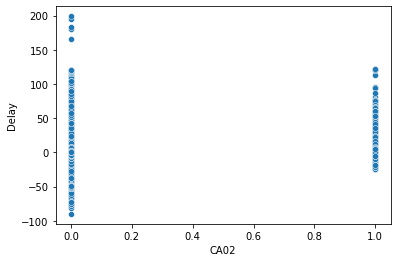

In [380]:
sns.scatterplot(df['CA02'],df['Delay'])

C:\Users\xyz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delay', ylabel='Density'>

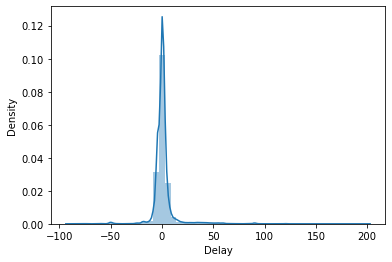

In [382]:

sns.distplot(df['Delay'])

C:\Users\xyz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='baseline_create_date_day_of_week', ylabel='Density'>

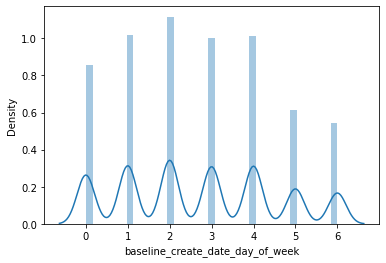

In [387]:
sns.distplot(df['baseline_create_date_day_of_week'])

C:\Users\xyz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

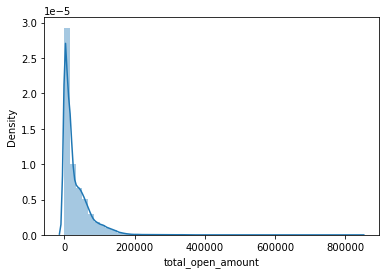

In [396]:
sns.distplot(df['total_open_amount'])

C:\Users\xyz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount_log', ylabel='Density'>

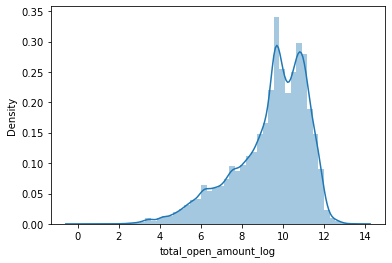

In [397]:
df['total_open_amount_log'] = np.log(df['total_open_amount'])
sns.distplot(df['total_open_amount_log'])
#fig = plt.figure()

In [402]:
df['total_open_amount_log'].describe()

count    49993.000000
mean         9.410743
std          1.784782
min          0.029559
25%          8.468522
50%          9.756964
75%         10.758294
max         13.639678
Name: total_open_amount_log, dtype: float64

In [399]:
df['total_open_amount_cube']=df['total_open_amount']**(1/3)
df['total_open_amount_cube'].skew()

0.2344017728935461

C:\Users\xyz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount_cube', ylabel='Density'>

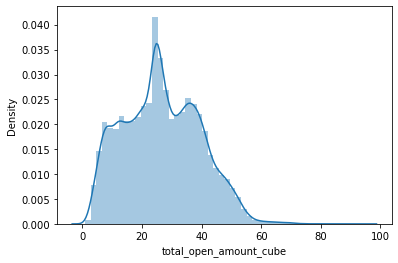

In [400]:
sns.distplot(df['total_open_amount_cube'])

In [403]:
df['total_open_amount_cube'].describe()

count    49993.000000
mean        26.667731
std         12.670099
min          1.009902
25%         16.824574
50%         25.850274
75%         36.092970
max         94.307368
Name: total_open_amount_cube, dtype: float64

In [398]:
df['total_open_amount_log'].skew()

-0.9788580119876549

In [388]:
df['total_open_amount'].skew()

2.85419333636931

C:\Users\xyz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_open_amount'>

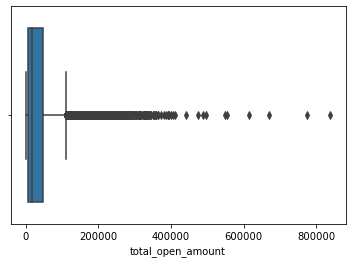

In [314]:
sns.boxplot(df['total_open_amount'])

In [390]:
df.describe()

,total_open_amount,isOpen,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,U007,U013,invoice_currency_numeric,due_in_date_day,clear_date_day,Delay
count,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,49993.000000,45580.000000,45580.000000
mean,32284.734302,0.088272,2019.200068,5.527954,15.292161,2.197448,2.698058,0.187486,0.080091,0.904107,0.003100,0.000280,0.000160,0.012262,0.919909,15.960294,15.949188,0.902962
std,39745.604488,0.283693,0.407093,3.404820,8.864817,1.112078,1.832157,0.390305,0.271437,0.294448,0.055596,0.016732,0.012649,0.110053,0.271437,8.693953,8.939441,10.872892
min,1.030000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-90.000000
25%,4762.470000,0.000000,2019.000000,3.000000,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,8.000000,-3.000000
50%,17274.100000,0.000000,2019.000000,5.000000,15.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16.000000,16.000000,0.000000
75%,47018.400000,0.000000,2019.000000,8.000000,23.000000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.000000,24.000000,2.000000
max,838758.370000,1.000000,2020.000000,12.000000,31.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,31.000000,199.000000


In [410]:
df.dtypes

cust_number                                 object
name_customer                               object
clear_date                          datetime64[ns]
due_in_date                         datetime64[ns]
total_open_amount                          float64
baseline_create_date                datetime64[ns]
cust_payment_terms                          object
isOpen                                       int64
baseline_create_date_year                    int64
baseline_create_date_month                   int64
baseline_create_date_day                     int64
baseline_create_date_quarter                 int64
baseline_create_date_day_of_week             int64
baseline_create_date_isWeekand               int32
CA02                                       float64
U001                                       float64
U002                                       float64
U005                                       float64
U007                                       float64
U013                           

## Target Encoding

In [441]:
mapper = df.groupby('cust_number')['Delay'].mean().to_dict()

In [442]:
df['Avg_delay'] = df['cust_number'].map(mapper)

In [443]:
mapper1 = df.groupby('cust_payment_terms')['total_open_amount_cube'].mean().to_dict()

In [444]:
df['Avg_amount_cube'] = df['cust_payment_terms'].map(mapper1)

In [445]:
mapper2 = df.groupby('cust_payment_terms')['total_open_amount'].mean().to_dict()

In [446]:
df['Avg_amount'] = df['cust_payment_terms'].map(mapper2)

In [455]:
mapper3 = df.groupby('cust_payment_terms')['total_open_amount_log'].mean().to_dict()

In [456]:
df['Avg_amount_log'] = df['cust_payment_terms'].map(mapper3)

In [435]:
#mapper1 = df.groupby('cust_payment_terms')['total_open_amount_cube'].mean().to_dict()

In [409]:
#df['Avg_delay']= df['cust_number'].map(mapper)

In [436]:
#df['A1'] =df['cust_payment_terms'].map(mapper1)

In [412]:
df['Avg_delay'].describe()

count    49957.000000
mean         0.831791
std          7.176217
min        -79.000000
25%         -2.236299
50%          0.333333
75%          1.642327
max        197.000000
Name: Avg_delay, dtype: float64

In [424]:
df['avg_total_open_amount'].skew()

-2.662502292878049

C:\Users\xyz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_delay', ylabel='Density'>

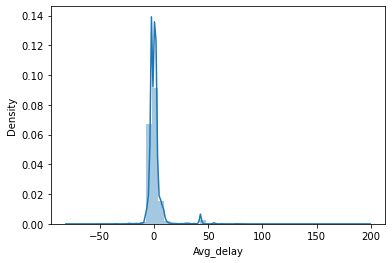

In [426]:
sns.distplot((df['Avg_delay']))

C:\Users\xyz\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_total_open_amount', ylabel='Density'>

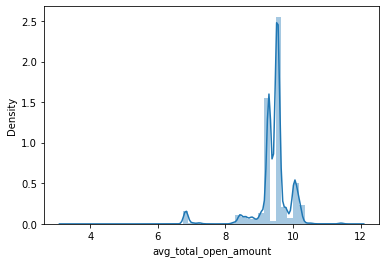

In [425]:
sns.distplot((df['avg_total_open_amount']))

In [458]:
df.head(3)

,cust_number,name_customer,clear_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,...,invoice_currency_numeric,due_in_date_day,clear_date_day,Delay,total_open_amount_log,total_open_amount_cube,Avg_delay,Avg_amount_cube,Avg_amount,Avg_amount_log
0,0140104392,FLANAG foundation,2019-04-29,2019-04-22,4398.10,2019-04-12,CA10,2019,4,12,...,0,22,29.0,7.0,8.388928,16.384066,7.291667,32.465979,57417.838284,10.045028
1,0200759878,SA in,2019-05-20,2019-05-17,15725.29,2019-05-02,NAH4,2019,5,2,...,1,17,20.0,3.0,9.663026,25.053374,1.139188,24.848175,23208.114691,9.285197
2,0200865666,RESTAU associates,2019-11-14,2019-11-14,3816.99,2019-10-30,NAA8,2019,10,30,...,1,14,14.0,0.0,8.247217,15.628130,2.339623,28.096296,37175.282240,9.533915


In [459]:
df.dtypes

cust_number                                 object
name_customer                               object
clear_date                          datetime64[ns]
due_in_date                         datetime64[ns]
total_open_amount                          float64
baseline_create_date                datetime64[ns]
cust_payment_terms                          object
baseline_create_date_year                    int64
baseline_create_date_month                   int64
baseline_create_date_day                     int64
baseline_create_date_quarter                 int64
baseline_create_date_day_of_week             int64
baseline_create_date_isWeekand               int32
CA02                                       float64
U001                                       float64
U002                                       float64
U005                                       float64
U007                                       float64
U013                                       float64
invoice_currency_numeric       

In [468]:
df['baseline_create_date_year'].value_counts()

2019    39707
2020    10144
2018      142
Name: baseline_create_date_year, dtype: int64

## Label Encoding

In [556]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
test['baseline_create_date_year']= label_encoder.fit_transform(test['baseline_create_date_year']) 

## Train test Split 

In [487]:
test = df[df['Delay'].isnull()].copy()


In [554]:
test.shape

(4413, 21)

In [588]:
x_test = test.copy()

In [590]:
x_test.drop(['Delay'],axis=1,inplace =True)

In [591]:
x_test.shape

(4413, 20)

In [592]:
y_test = test['Delay'].copy()

In [593]:
y_test.shape

(4413,)

In [558]:
test.head(10)

,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,...,U013,invoice_currency_numeric,due_in_date_day,Delay,total_open_amount_log,total_open_amount_cube,Avg_delay,Avg_amount_cube,Avg_amount,Avg_amount_log
45587,0,3,20,1,4,0,0.0,1.0,0.0,0.0,...,0.0,1,24,NaN,10.834429,37.020665,7.867403,26.849996,23824.497103,9.745574
45588,0,3,20,1,4,0,0.0,1.0,0.0,0.0,...,0.0,1,4,NaN,10.565227,33.843348,2.653846,28.096296,37175.282240,9.533915
45589,0,3,9,1,0,0,1.0,0.0,0.0,0.0,...,0.0,0,19,NaN,9.769836,25.961432,-0.555556,32.465979,57417.838284,10.045028
45590,0,5,1,2,4,0,0.0,1.0,0.0,0.0,...,0.0,1,16,NaN,9.598599,24.521076,-2.236299,24.848175,23208.114691,9.285197
45591,0,3,20,1,4,0,0.0,1.0,0.0,0.0,...,0.0,1,4,NaN,10.980206,38.864012,-2.236299,24.848175,23208.114691,9.285197
45592,0,4,29,2,2,0,0.0,1.0,0.0,0.0,...,0.0,1,14,NaN,9.296271,22.170378,0.658892,28.096296,37175.282240,9.533915
45593,0,3,27,1,4,0,0.0,1.0,0.0,0.0,...,0.0,1,11,NaN,8.374468,16.305284,0.839623,26.137560,24814.293701,9.580154
45594,0,3,8,1,6,1,0.0,1.0,0.0,0.0,...,0.0,1,23,NaN,8.921781,19.568612,-2.236299,24.848175,23208.114691,9.285197
45595,0,5,5,2,1,0,0.0,1.0,0.0,0.0,...,0.0,1,20,NaN,9.705187,25.407957,-0.311475,32.625853,50260.762826,10.179660
45596,0,3,20,1,4,0,0.0,1.0,0.0,0.0,...,0.0,1,4,NaN,11.070094,40.046099,1.000000,28.096296,37175.282240,9.533915


In [561]:
test.isnull().sum()

baseline_create_date_year              0
baseline_create_date_month             0
baseline_create_date_day               0
baseline_create_date_quarter           0
baseline_create_date_day_of_week       0
baseline_create_date_isWeekand         0
CA02                                   0
U001                                   0
U002                                   0
U005                                   0
U007                                   0
U013                                   0
invoice_currency_numeric               0
due_in_date_day                        0
Delay                               4413
total_open_amount_log                  0
total_open_amount_cube                 0
Avg_delay                             36
Avg_amount_cube                        0
Avg_amount                             0
Avg_amount_log                         0
dtype: int64

In [555]:
test.describe()

,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,...,U013,invoice_currency_numeric,due_in_date_day,Delay,total_open_amount_log,total_open_amount_cube,Avg_delay,Avg_amount_cube,Avg_amount,Avg_amount_log
count,4413.0,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,...,4413.000000,4413.000000,4413.000000,0.0,4413.000000,4413.000000,4377.000000,4413.000000,4413.000000,4413.000000
mean,0.0,3.572853,14.635395,1.489010,2.761160,0.200544,0.076365,0.917063,0.002266,0.000453,...,0.003626,0.923635,16.055518,NaN,9.458102,26.900950,0.090651,26.695008,32401.375022,9.412934
std,0.0,0.731965,9.368723,0.499936,1.861736,0.400453,0.265612,0.275818,0.047554,0.021286,...,0.060111,0.265612,8.119900,NaN,1.745976,12.415588,5.261457,4.148800,12751.616054,0.572795
min,0.0,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,NaN,0.916291,1.357209,-35.500000,5.204826,179.976364,4.817753
25%,0.0,3.000000,6.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,9.000000,NaN,8.542145,17.242577,-2.236299,24.848175,23208.114691,9.285197
50%,0.0,3.000000,14.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,17.000000,NaN,9.785296,26.095561,-0.359738,28.096296,37175.282240,9.533915
75%,0.0,4.000000,23.000000,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,23.000000,NaN,10.769937,36.233312,1.139188,28.096296,37175.282240,9.533915
max,0.0,5.000000,31.000000,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,31.000000,NaN,13.639678,94.307368,62.285714,45.375726,97275.785732,11.415311


In [492]:
test.drop(['cust_number','name_customer','clear_date','due_in_date','baseline_create_date','cust_payment_terms','clear_date_day','total_open_amount'],axis=1,inplace=True)

In [509]:
train_temp = df[~df['Delay'].isnull()].copy()

In [540]:
train_temp.shape

(45580, 29)

In [518]:
train_temp.head(3)

,cust_number,name_customer,clear_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,...,invoice_currency_numeric,due_in_date_day,clear_date_day,Delay,total_open_amount_log,total_open_amount_cube,Avg_delay,Avg_amount_cube,Avg_amount,Avg_amount_log
19715,0200980828,BEN E corporation,2019-01-04,2019-01-15,30804.36,2018-12-31,NAA8,2018,12,31,...,1,15,4.0,-11.0,10.335412,31.347583,-1.189655,28.096296,37175.282240,9.533915
35764,0200287284,CALIFO us,2019-01-04,2019-01-30,385913.65,2018-12-31,NAD5,2018,12,31,...,1,30,4.0,-26.0,12.863369,72.805364,-23.500000,32.402506,50723.463733,10.151130
13013,0100058056,SIMPLO,2019-01-04,2019-01-18,65462.40,2019-01-03,NAA8,2019,1,3,...,1,18,4.0,-14.0,11.089231,40.302375,-12.000000,28.096296,37175.282240,9.533915


In [500]:
#train.drop(['cust_number','name_customer','clear_date','due_in_date','baseline_create_date','cust_payment_terms','clear_date_day','total_open_amount'],axis=1,inplace=True)

In [515]:
train_temp.isnull().sum()

cust_number                         0
name_customer                       0
clear_date                          0
due_in_date                         0
total_open_amount                   0
baseline_create_date                0
cust_payment_terms                  0
baseline_create_date_year           0
baseline_create_date_month          0
baseline_create_date_day            0
baseline_create_date_quarter        0
baseline_create_date_day_of_week    0
baseline_create_date_isWeekand      0
CA02                                0
U001                                0
U002                                0
U005                                0
U007                                0
U013                                0
invoice_currency_numeric            0
due_in_date_day                     0
clear_date_day                      0
Delay                               0
total_open_amount_log               0
total_open_amount_cube              0
Avg_delay                           0
Avg_amount_c

In [517]:
#Sorting train_temp for validation set
train_temp.sort_values('clear_date',inplace = True)

In [522]:
#Getting count of recent records
(train_temp['clear_date']>'2020-01-01').sum()

5940

In [538]:
#validaton set
val = train_temp.iloc[-5940:].copy()

In [539]:
val.shape

(5940, 29)

In [550]:
val.drop(['cust_number','name_customer','clear_date','due_in_date','baseline_create_date','cust_payment_terms','clear_date_day','total_open_amount'],axis=1,inplace=True)

In [559]:
val.head(3)

,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,...,U013,invoice_currency_numeric,due_in_date_day,Delay,total_open_amount_log,total_open_amount_cube,Avg_delay,Avg_amount_cube,Avg_amount,Avg_amount_log
2945,0,12,30,4,0,0,0.0,1.0,0.0,0.0,...,0.0,1,14,-11.0,8.941061,19.694782,-1.189655,28.096296,37175.28224,9.533915
16151,0,12,30,4,0,0,0.0,1.0,0.0,0.0,...,0.0,1,14,-11.0,10.843635,37.134451,-4.566667,28.096296,37175.28224,9.533915
9709,0,12,30,4,0,0,0.0,1.0,0.0,0.0,...,0.0,1,14,-8.0,10.513782,33.267932,-8.208333,28.096296,37175.28224,9.533915


In [551]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
val['baseline_create_date_year']= label_encoder.fit_transform(val['baseline_create_date_year']) 

In [552]:
val.describe()

,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,...,U013,invoice_currency_numeric,due_in_date_day,Delay,total_open_amount_log,total_open_amount_cube,Avg_delay,Avg_amount_cube,Avg_amount,Avg_amount_log
count,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,...,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000,5940.000000
mean,0.964815,1.856566,15.611448,1.105556,2.664646,0.193266,0.065657,0.917677,0.002525,0.000505,...,0.013636,0.934343,15.790236,0.609091,9.392193,26.535630,0.774332,26.567921,31755.999995,9.404201
std,0.184263,1.997633,8.801177,0.552789,1.860969,0.394893,0.247702,0.274880,0.050193,0.022470,...,0.115986,0.247702,8.642988,10.662847,1.795380,12.615458,6.962757,4.222020,12652.023127,0.594135
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-62.000000,1.791759,1.817121,-23.200000,3.098140,36.632500,3.284716
25%,1.000000,1.000000,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,8.000000,-3.000000,8.457264,16.761557,-2.236299,24.848175,23208.114691,9.285197
50%,1.000000,2.000000,16.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,15.000000,0.000000,9.736562,25.675071,0.132530,28.096296,37175.282240,9.533915
75%,1.000000,2.000000,23.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,24.000000,2.000000,10.758203,36.091869,1.494465,28.096296,37175.282240,9.533915
max,1.000000,12.000000,31.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,31.000000,122.000000,13.072090,78.051065,55.275000,52.686672,146252.160000,11.893088


In [543]:
#training set
train = train_temp.iloc[5940:].copy()

In [670]:
x_val = val.copy()

In [672]:
x_val.drop(['Delay'],axis=1,inplace=True)

In [673]:
x_val.shape

(5940, 20)

In [674]:
y_val=val['Delay'].copy()

In [675]:
y_val.shape

(5940,)

In [549]:
train.shape

(39640, 21)

In [579]:
x_train = train.copy()

In [ ]:
x_train.drop(['Delay'],axis=1,inplace =True)

In [582]:
x_train.shape

(39640, 20)

In [586]:
y_train = train['Delay'].copy()

In [587]:
y_train.shape

(39640,)

In [545]:
train.drop(['cust_number','name_customer','clear_date','due_in_date','baseline_create_date','cust_payment_terms','clear_date_day','total_open_amount'],axis=1,inplace=True)

In [547]:
train.head(3)

,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,...,U013,invoice_currency_numeric,due_in_date_day,Delay,total_open_amount_log,total_open_amount_cube,Avg_delay,Avg_amount_cube,Avg_amount,Avg_amount_log
9465,1,3,2,1,5,1,0.0,1.0,0.0,0.0,...,0.0,1,2,12.0,9.906378,27.170345,12.000000,22.654248,16990.218824,9.159400
13526,1,2,27,1,2,0,0.0,1.0,0.0,0.0,...,0.0,1,14,0.0,9.497531,23.708736,0.805556,28.096296,37175.282240,9.533915
38929,1,2,25,1,0,0,0.0,1.0,0.0,0.0,...,0.0,1,1,-48.0,8.357642,16.214089,-1.814815,18.873026,12501.450103,8.432889


In [546]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
train['baseline_create_date_year']= label_encoder.fit_transform(train['baseline_create_date_year']) 

In [548]:
train.describe()

,baseline_create_date_year,baseline_create_date_month,baseline_create_date_day,baseline_create_date_quarter,baseline_create_date_day_of_week,baseline_create_date_isWeekand,CA02,U001,U002,U005,...,U013,invoice_currency_numeric,due_in_date_day,Delay,total_open_amount_log,total_open_amount_cube,Avg_delay,Avg_amount_cube,Avg_amount,Avg_amount_log
count,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,...,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000,39640.000000
mean,1.144551,6.313194,15.359914,2.445081,2.694223,0.187765,0.081458,0.900505,0.003406,0.000202,...,0.014253,0.918542,16.085141,1.062185,9.410802,26.657357,1.023996,26.650888,32235.206524,9.409175
std,0.351724,3.307964,8.801697,1.092420,1.832009,0.390529,0.273541,0.299330,0.058259,0.014205,...,0.118535,0.273541,8.767833,11.346044,1.780204,12.676650,7.594755,4.168458,12647.471558,0.583058
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,-90.000000,0.029559,1.009902,-79.000000,3.098140,36.632500,3.284716
25%,1.000000,3.000000,8.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,8.000000,-3.000000,8.470684,16.836706,-2.236299,24.848175,23208.114691,9.285197
50%,1.000000,6.000000,16.000000,2.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,16.000000,0.000000,9.750176,25.791854,0.405941,28.096296,37175.282240,9.533915
75%,1.000000,9.000000,23.000000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,24.000000,2.000000,10.756187,36.067620,1.642327,28.096296,37175.282240,9.533915
max,2.000000,12.000000,31.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,31.000000,199.000000,13.559003,91.805095,197.000000,52.686672,146252.160000,11.893088


In [560]:
train.isnull().sum()

baseline_create_date_year           0
baseline_create_date_month          0
baseline_create_date_day            0
baseline_create_date_quarter        0
baseline_create_date_day_of_week    0
baseline_create_date_isWeekand      0
CA02                                0
U001                                0
U002                                0
U005                                0
U007                                0
U013                                0
invoice_currency_numeric            0
due_in_date_day                     0
Delay                               0
total_open_amount_log               0
total_open_amount_cube              0
Avg_delay                           0
Avg_amount_cube                     0
Avg_amount                          0
Avg_amount_log                      0
dtype: int64

In [598]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(39640, 20) (39640,)
(4413, 20) (4413,)


In [792]:
%pwd

'C:\\Users\\xyz'

In [569]:
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(train)
#the number of non-constant features.
len(train.columns[constant_filter.get_support()])

21

In [571]:
constant_columns = [column for column in train.columns
                    if column not in train.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [573]:
# transpose the feature matrice
train_T = train.T
# print the number of duplicated features
print(train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = train_T[train_T.duplicated()].index.values

0


In [574]:
#There is no duplicate column present 
duplicated_columns

array([], dtype=object)

<AxesSubplot:>

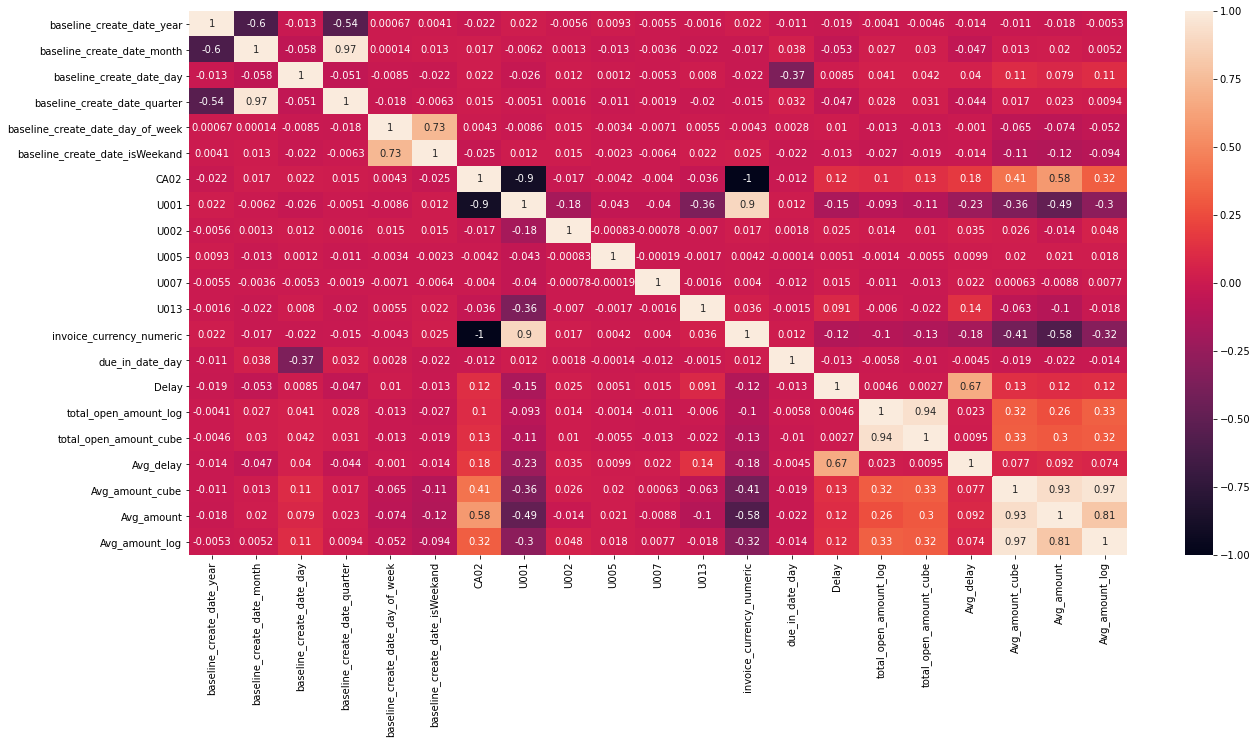

In [575]:
#visualisation
corr=train.corr()
plt.figure(figsize=(21,10))
sns.heatmap(corr,annot=True)

In [577]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [578]:
#in the time of checking co-relation we have to check with target also that's why I am passing out output_label also
handling_correlation(train.copy(),0.70)

['invoice_currency_numeric',
 'total_open_amount_cube',
 'U001',
 'baseline_create_date_isWeekand',
 'Avg_amount',
 'Avg_amount_log',
 'baseline_create_date_quarter']

In [600]:
!pip install mlxtend --user

You should consider upgrading via the 'C:\Users\xyz\anaconda3\python.exe -m pip install --upgrade pip' command.


In [601]:
def FFS(X,y):
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    # Sequential Forward Selection(sfs)
    sfs = SFS(LinearRegression(),
              k_features=8,
              forward=True,
              scoring = 'r2',
              cv = 5)
    """
    LinearRegression() is an estimator for the entire process. Similarly, it can be any classification based algorithm.

    k_features indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.

    we give forward=True if we want forward feature selection

    The scoring argument specifies the evaluation criterion to be used. For regression problems, there is only r2 score in default implementation. Similarly for classification, it can be accuracy, precision, recall, f1-score, etc.

    cv argument is for k-fold cross-validation. 

    """
    sfs.fit(X, y)#doing the FFS
    
    return sfs.k_feature_names_

In [602]:
FFS(x_train,y_train)#features selected by FFS

('baseline_create_date_day',
 'baseline_create_date_day_of_week',
 'CA02',
 'due_in_date_day',
 'total_open_amount_log',
 'total_open_amount_cube',
 'Avg_delay',
 'Avg_amount_log')

In [604]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

'\nNow you can choose top n features with higher feature importances.\n\n'

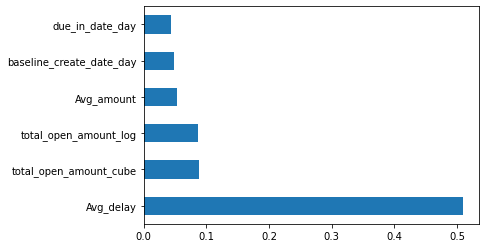

In [605]:
feature_importance=tree_based_feature_importance(x_train,y_train)#features importance data frame

"""
Now you can choose top n features with higher feature importances.

"""


In [609]:
display(feature_importance)

,Features,Importances
16,Avg_delay,0.508999
15,total_open_amount_cube,0.087726
14,total_open_amount_log,0.086586
18,Avg_amount,0.053680
2,baseline_create_date_day,0.048715
13,due_in_date_day,0.043562
19,Avg_amount_log,0.038014
1,baseline_create_date_month,0.036173
4,baseline_create_date_day_of_week,0.028097
17,Avg_amount_cube,0.026832


In [607]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#I am going to use RandomForestRegressor algoritham as an estimator. Your can select other regression alogritham as well.
from sklearn.ensemble import RandomForestRegressor
#k_features=10 (It will get top 10 features best suited for prediction)
#forward=True (Forward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
model=sfs(RandomForestRegressor(),k_features=10,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   27.6s remaining:    6.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished

[2021-02-01 07:18:56] Features: 1/10 -- score: 0.4020064603937576[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  19 | elapsed:  1.2min remaining:   25.5s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  1.7min finished

[2021-02-01 07:20:41] Features: 2/10 -- score: 0.5021883781190637[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  1.1min remaining:   25.9s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.0min finished

[2021-02-01 07:22:41] Features: 3/10 -- score: 0.5028095690802896[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=10,
                          n_jobs=-1, scoring='r2', verbose=2)

In [608]:
model.k_feature_names_

('CA02',
 'U001',
 'U005',
 'U007',
 'U013',
 'invoice_currency_numeric',
 'Avg_delay',
 'Avg_amount_cube',
 'Avg_amount',
 'Avg_amount_log')

In [610]:
# Filtering out the warnings after Cell Execution
import warnings
warnings.filterwarnings('ignore')


In [612]:
!pip install xgboost --user

You should consider upgrading via the 'C:\Users\xyz\anaconda3\python.exe -m pip install --upgrade pip' command.


In [613]:
# Importing in Common Data Science Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Modeling & Accuracy Metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [704]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

In [622]:
x_test['Avg_delay'].fillna(x_test['Avg_delay'].mean(),inplace =True)

In [626]:
y_test.isnull().sum()

4413

In [679]:
#selected features

In [705]:
f = ['CA02','Avg_amount_cube','Avg_delay','total_open_amount_cube','invoice_currency_numeric','baseline_create_date_isWeekand']

In [743]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(x_train[f], y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val[f])

In [707]:
print(mean_squared_error(y_val, predicted))

62.147719983242816


In [744]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [741]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(x_train[f], y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val[f])

In [693]:
print(mean_squared_error(y_val, predicted))

62.14773325803078


In [742]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [745]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train[f], y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val[f])

In [696]:
print(mean_squared_error(y_val, predicted))

8.824887266262166


In [746]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [747]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(x_train[f], y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val[f])

In [729]:
print(mean_squared_error(y_val, predicted))

29.15226800554938


In [730]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val)

In [731]:
print(mean_squared_error(y_val, predicted))

284.10674045601


In [749]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [752]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [753]:
# Score Card
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,62.147720,0.453296
1,Support Vector Regression,62.195532,0.452876
2,Random Forest Regressor,7.960506,0.929973
3,XGB Regressor,29.152268,0.743552
4,Decision Tree Regressor,284.106740,-1.499242
5,Decision Tree Regressor,1.267950,0.988846
6,Decision Tree Regressor,62.195532,0.452876
7,Decision Tree Regressor,62.147720,0.453296
8,Decision Tree Regressor,7.863599,0.930825
9,XGB Regressor,29.152268,0.743552


In [750]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(x_train[f], y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_val[f])

In [751]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [737]:
print(mean_squared_error(y_val, predicted))

1.2679503078398986


In [754]:
# 0-15 days -> 1
# 16-30 days ->2
# 31-45 days ->3
# 46-60 days ->4
# Greater than 60 days ->5
# Less than 0 days ->6

In [755]:
# USING RANDOM FOREST

In [756]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(x_train[f], y_train)

# Predicting the Test Set Results
predicted = clf.predict(x_test[f])

In [779]:
predicted

array([1.2 , 2.84, 0.27, ..., 0.49, 0.85, 0.52])

In [780]:
predicted_ceil = np.ceil(predicted) 

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [783]:
y_test_temp = pd.DataFrame(predicted_ceil, columns = ['Delay'])

In [789]:
y_test_temp.head(50)

,Delay
0,2.0
1,3.0
2,1.0
3,-3.0
4,1.0
5,1.0
6,-0.0
7,-3.0
8,2.0
9,1.0


array([1.2 , 2.84, 0.27, ..., 0.49, 0.85, 0.52])

In [785]:
bins = np.array([-51,0,16,31,46,60,114])
tt = pd.DataFrame(np.digitize(y_test_temp, bins), columns=y_test_temp.columns)

In [791]:
## tt is the dataframe with the delay bucket as mentioned
tt.head(50)

,Delay
0,2
1,2
2,2
3,1
4,2
5,2
6,2
7,1
8,2
9,2


In [793]:
tt.value_counts()

Delay
2        2905
1        1433
3          29
4          25
5          14
6           6
7           1
dtype: int64